In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import rawpy, imageio
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 18)

# Read RAW

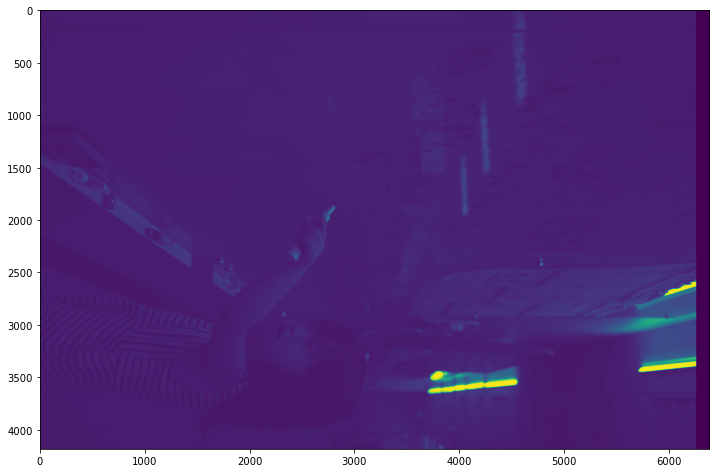

In [3]:
raw = rawpy.imread('image.RAF')
plt.imshow(raw.raw_image)

# Demosaic

In [4]:
rgb = raw.postprocess(no_auto_bright=True,use_auto_wb=False,gamma=None)
rgb.shape

(6246, 4170, 3)

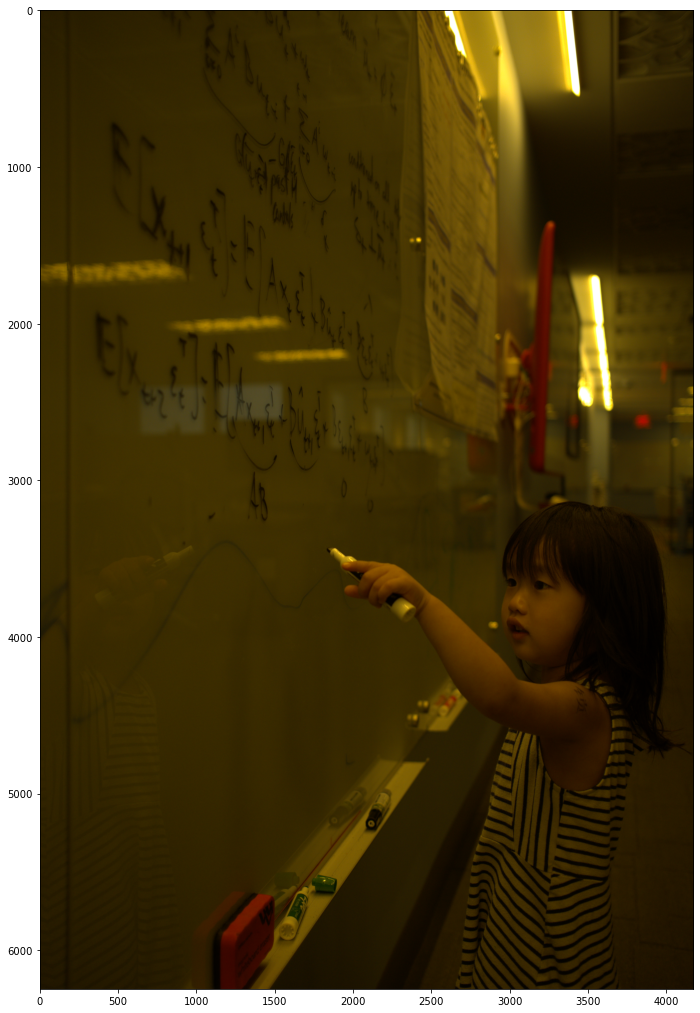

In [5]:
plt.imshow(rgb)

# Black and white

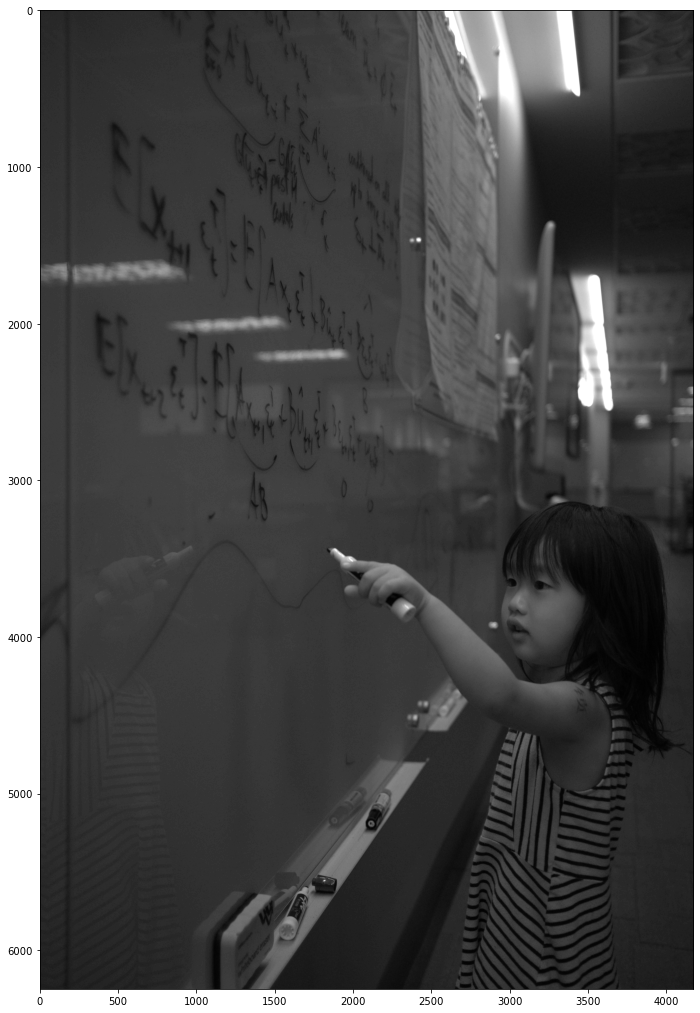

In [6]:
# https://www.johndcook.com/blog/2009/08/24/algorithms-convert-color-grayscale/
bw = (0.21 * rgb[:, :, 0]) + (0.72 * rgb[:, :, 0]) + (0.07 * rgb[:, :, 0])

plt.imshow(bw, cmap='gray', vmin=0, vmax=255)

# Adding (bad) grain

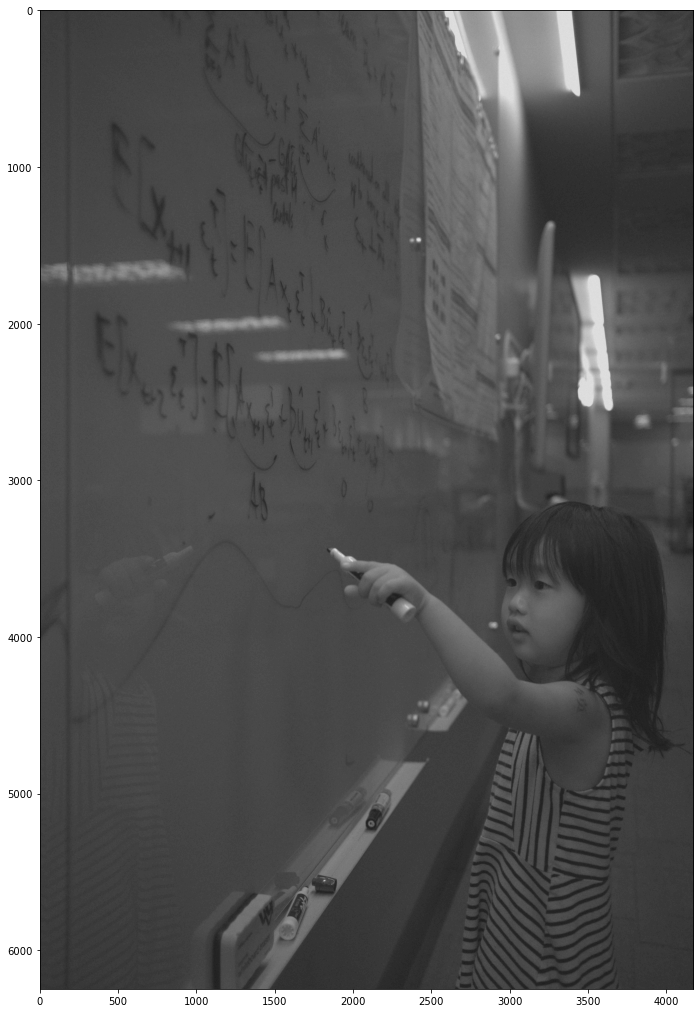

In [7]:
grain = np.random.normal(0, 10, bw.shape) + bw

plt.imshow(grain, cmap="gray")

# Add (bad) contrast

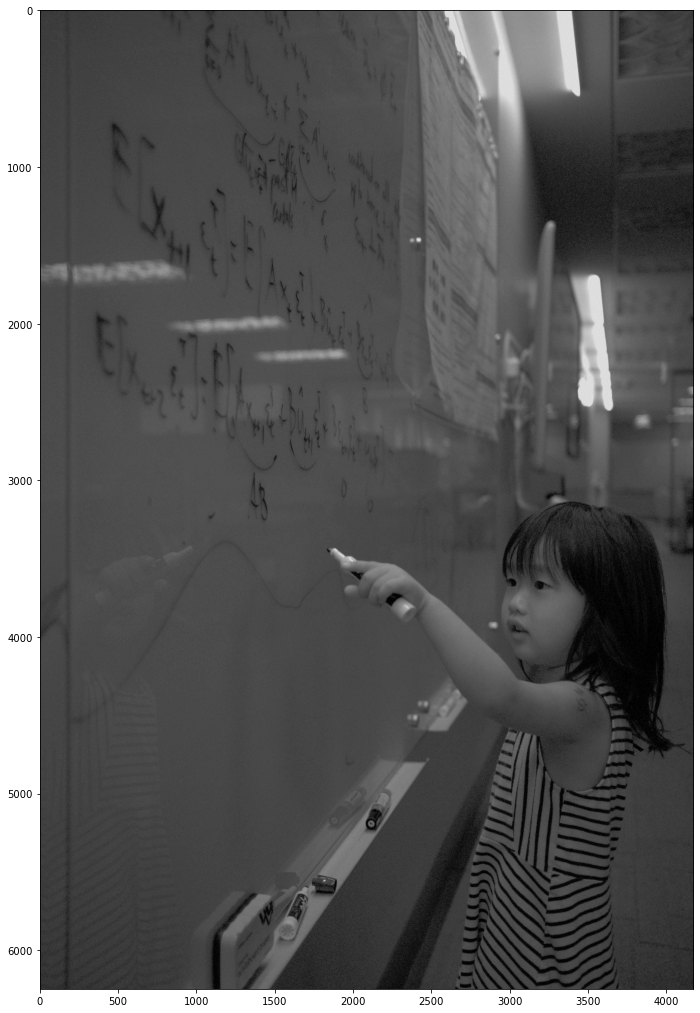

In [8]:
contrast = grain - grain.min()
contrast[contrast < 60] = 0

plt.imshow(contrast, cmap="gray")

# Lol, vignette

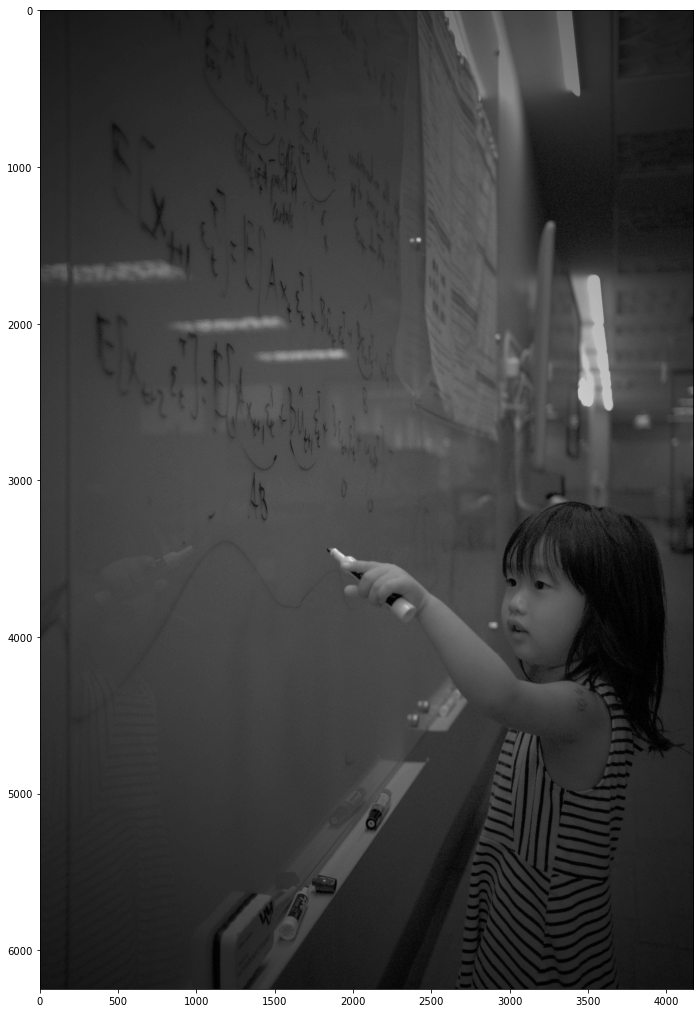

In [9]:
row, col = contrast.shape
xs = np.arange(row)
ys = np.arange(col)
distance_squared = (xs - row / 2.0) [:, np.newaxis] ** 2 + (ys - col / 2.0) ** 2
sigma_squared = (row / 2) ** 2 + (col / 2) ** 2
falloff = np.exp(-distance_squared / sigma_squared)
vignette = contrast * (falloff * 1.5)

plt.imshow(vignette, cmap="gray")